In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import re
import string
from collections import Counter
import nltk

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
spotify = pd.read_csv('LyricsFeaturesGenre.csv')

# EDA

In [3]:
spotify.head()

,track_album,track_artist,track_title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_uri,track_id,track_lyric,genres
0,Taylor Swift,Taylor Swift,Tim McGraw,0.580,0.491,0,-6.462,1,0.0251,0.575,0.0,0.1210,0.425,76.009,232107,4,spotify:track:0Om9WAB5RS09L80DyOfTNa,0Om9WAB5RS09L80DyOfTNa,He said the way my blue eyes shined\nPut those...,Country
1,Taylor Swift,Taylor Swift,Picture To Burn,0.658,0.877,7,-2.098,1,0.0323,0.173,0.0,0.0962,0.821,105.586,173067,4,spotify:track:32mVHdy0bi1XKgr0ajsBlG,32mVHdy0bi1XKgr0ajsBlG,"State the obvious, I didn't get my perfect fan...",Country Rock
2,Taylor Swift,Taylor Swift,Teardrops On My Guitar,0.621,0.417,10,-6.941,1,0.0231,0.288,0.0,0.1190,0.289,99.953,203040,4,spotify:track:7zMcNqs55Mxer82bvZFkpg,7zMcNqs55Mxer82bvZFkpg,Drew looks at me\nI fake a smile so he won't s...,Country Pop
3,Taylor Swift,Taylor Swift,A Place In This World,0.576,0.777,9,-2.881,1,0.0324,0.051,0.0,0.3200,0.428,115.028,199200,4,spotify:track:73OX8GdpOeGzKC6OvGSbsv,73OX8GdpOeGzKC6OvGSbsv,"I don't know what I want, so don't ask me\nCau...",Country Pop
4,Taylor Swift,Taylor Swift,Cold as You,0.418,0.482,5,-5.769,1,0.0266,0.217,0.0,0.1230,0.261,175.558,239013,4,spotify:track:7an1exwMnfYRcdVQm0yDev,7an1exwMnfYRcdVQm0yDev,You have a way of coming easily to me\nAnd whe...,Country


In [4]:
spotify.tail()

,track_album,track_artist,track_title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_uri,track_id,track_lyric,genres
106,Lover,Taylor Swift,Miss Americana & the Heartbreak Prince,0.662,0.747,11,-6.926,0,0.0736,0.02800,0.006150,0.1380,0.487,150.088,234147,4,spotify:track:214nt20w5wOxJnY462klLw,214nt20w5wOxJnY462klLw,"You know I adore you, I'm crazier for you\nTha...",Electropop
107,Lover,Taylor Swift,Paper Rings,0.811,0.719,9,-6.553,1,0.0497,0.01290,0.000014,0.0742,0.865,103.979,222400,4,spotify:track:4y5bvROuBDPr5fuwXbIBZR,4y5bvROuBDPr5fuwXbIBZR,The moon is high\nLike your friends were the n...,Pop Punk
108,Lover,Taylor Swift,Soon You'll Get Better (feat. Dixie Chicks),0.433,0.182,0,-12.566,1,0.0641,0.90700,0.000000,0.1230,0.421,207.476,201587,4,spotify:track:4AYtqFyFbX0Xkc2wtcygTr,4AYtqFyFbX0Xkc2wtcygTr,The buttons of my coat were tangled in my hair...,Country
109,Lover,Taylor Swift,The Archer,0.292,0.574,0,-9.375,1,0.0401,0.12000,0.005690,0.0663,0.166,124.344,211240,4,spotify:track:3pHkh7d0lzM2AldUtz2x37,3pHkh7d0lzM2AldUtz2x37,Combat\nI'm ready for combat\nI say I don't wa...,Dream Pop
110,Lover,Taylor Swift,You Need to Calm Down,0.771,0.671,2,-5.617,1,0.0553,0.00929,0.000000,0.0637,0.714,85.026,171360,4,spotify:track:6RRNNciQGZEXnqk8SQ9yv5,6RRNNciQGZEXnqk8SQ9yv5,You are somebody that I don't know\nBut you're...,Pop


In [5]:
spotify['year_released'] = spotify['track_album']
spotify['year_released'] = spotify['year_released'].replace(['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989',
       'reputation', 'Lover'],[2006,2008,2010,2012,2014,2017,2019])

In [6]:
spotify['world_sales_USD'] = spotify['track_album'].replace(['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989',
       'reputation', 'Lover'],[7000000,12000000,5500000,6000000,10500000,5000000,4000000])

In [7]:
spotify.describe(include='all')

,track_album,track_artist,track_title,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_ms,time_signature,track_uri,track_id,track_lyric,genres,year_released,world_sales_USD
count,111,111,111,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111,111,111,111,111.000000,1.110000e+02
unique,7,5,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,111,111,111,16,NaN,NaN
top,Red,Taylor Swift,Bad Blood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,spotify:track:1dGr1c8CrMLDpV6mPbImSI,7vvIpJZye5cRR6De1LKM0m,You should've been there\nShould've burst thro...,Country Pop,NaN,NaN
freq,19,107,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,1,22,NaN,NaN
mean,NaN,NaN,NaN,0.613595,0.616441,4.639640,-6.453261,0.882883,0.073693,0.197342,...,0.423593,122.176027,231977.243243,3.963964,NaN,NaN,NaN,NaN,2012.504505,6.959459e+06
std,NaN,NaN,NaN,0.112205,0.176523,3.257977,2.266960,0.323018,0.132049,0.253976,...,0.198856,31.460427,45882.035346,0.328299,NaN,NaN,NaN,NaN,4.289255,2.681702e+06
min,NaN,NaN,NaN,0.292000,0.151000,0.000000,-12.864000,0.000000,0.023100,0.000197,...,0.049900,68.534000,51920.000000,1.000000,NaN,NaN,NaN,NaN,2006.000000,4.000000e+06
25%,NaN,NaN,NaN,0.552500,0.484000,2.000000,-7.499500,1.000000,0.029500,0.022950,...,0.264500,96.005000,207813.500000,4.000000,NaN,NaN,NaN,NaN,2010.000000,5.000000e+06
50%,NaN,NaN,NaN,0.612000,0.651000,5.000000,-6.237000,1.000000,0.037200,0.082600,...,0.416000,118.984000,231000.000000,4.000000,NaN,NaN,NaN,NaN,2012.000000,6.000000e+06
75%,NaN,NaN,NaN,0.691000,0.753000,7.000000,-4.947000,1.000000,0.063500,0.238500,...,0.558000,146.015000,245080.000000,4.000000,NaN,NaN,NaN,NaN,2017.000000,1.050000e+07


In [8]:
spotify['genres'].unique()

array(['Country', 'Country Rock', 'Country Pop', 'Contemporary Country',
       'Pop Rock', 'Folk Pop', 'Blue grass', 'Pop Punk', 'Soft Rock',
       'Alternative Rock', 'Pop', 'Electropop', 'Synth Pop', 'Dance Pop',
       'Dream Pop', 'R&B'], dtype=object)

In [9]:
spotify.track_lyric[0]

'He said the way my blue eyes shined\nPut those Georgia stars to shame that night\nI said, "That\'s a lie"\nJust a boy in a Chevy truck\nThat had a tendency of gettin\' stuck\nOn backroads at night\nAnd I was right there beside him all summer long\nAnd then the time we woke up to find that summer gone\nBut when you think Tim McGraw\nI hope you think my favorite song\nThe one we danced to all night long\nThe moon like a spotlight on the lake\nWhen you think happiness\nI hope you think that little black dress\nThink of my head on your chest\nAnd my old faded blue jeans\nWhen you think Tim McGraw\nI hope you think of me\nSeptember saw a month of tears\nAnd thankin\' God that you weren\'t here\nTo see me like that\nBut in a box beneath my bed\nIs a letter that you never read\nFrom three summers back\nIt\'s hard not to find it all a little bittersweet\nAnd lookin\' back on all of that, it\'s nice to believe\nWhen you think Tim McGraw\nI hope you think my favorite song\nThe one we danced to 

# Cleaning for NLP

In [10]:
remove_n = lambda x: re.sub('\n',' ',x)
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

spotify['track_lyric'] = spotify.track_lyric.map(remove_n).map(punc_lower).map(alphanumeric)

In [11]:
spotify.track_lyric[62]

'don t look at me  you got a girl at home and everybody knows that  everybody knows that don t look at me  you got a girl at home and everybody knows that  everybody knows that i don t even know her but i feel a responsibility to do what s upstanding and right it s kinda like a code  yeah and you ve been getting closer and closer and crossing so many lines and it would be a fine proposition if i was a stupid girl but honey i am no one s exception this i have previously learned so don t look at me  you got a girl at home and everybody knows that  everybody knows that don t look at me  you got a girl at home and everybody knows that  everybody knows that i see you turn off your phone now you ve got me alone  and i say don t look at me  you got a girl at home and everybody knows that  everybody knows that i just want to make sure you understand perfectly you re the kind of man who makes me sad while she waits up  you chase down the newest thing and take for granted what you have and it wo

In [12]:
song_titles = spotify['track_title'].values

# NLP Round 1:

## Document-term Matrix with just Unigrams

In [13]:
vectorizer = CountVectorizer(stop_words='english', min_df=0.1,max_df=0.7)

doc_matrix = vectorizer.fit_transform(spotify.track_lyric)

doc_matrix = pd.DataFrame(doc_matrix.toarray(), columns=vectorizer.get_feature_names())

In [14]:
doc_matrix.head()

,ain,away,baby,bad,beautiful,best,better,blue,break,car,...,walk,wanna,want,wanted,way,won,world,wrong,yeah,years
0,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,0,2,5,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,2,0,1,0,1,3,...,0,0,1,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,3,3,1,0
4,0,4,0,0,0,1,0,0,0,0,...,2,0,1,1,1,0,0,0,0,0


## Document-term Matrix with Bigrams and Unigrams

In [15]:
vectorizer_bi = CountVectorizer(ngram_range=(1,2),binary=True,stop_words='english',min_df=0.1,max_df=0.7)

doc_matrix_bi = vectorizer_bi.fit_transform(spotify.track_lyric)

bi_doc_matrix = pd.DataFrame(doc_matrix_bi.toarray(), columns=vectorizer_bi.get_feature_names())

In [16]:
bi_doc_matrix.head()

,ain,away,baby,bad,beautiful,best,better,blue,break,car,...,walk,wanna,want,wanted,way,won,world,wrong,yeah,years
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,1,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,1,1,1,0,0,0,0,0


## Scree Plots

Text(0.5, 1.0, 'Scree plot')

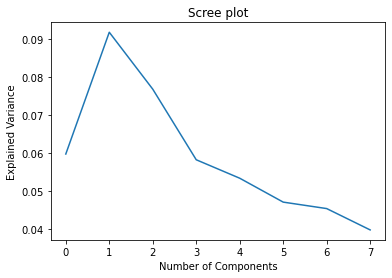

In [17]:
lsascree = TruncatedSVD(8)
lsascree.fit(doc_matrix)
lsa_features = lsascree.transform(doc_matrix)
plt.plot(lsascree.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree plot')

Text(0.5, 1.0, 'Scree plot')

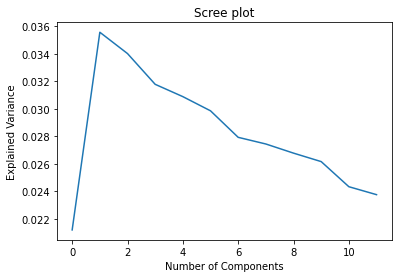

In [18]:
lsascree = TruncatedSVD(12)
lsascree.fit(doc_matrix_bi)
lsa_features = lsascree.transform(doc_matrix_bi)
plt.plot(lsascree.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree plot')

# LSA

In [19]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [20]:
def lsa_function(num_components, doc_text_matrix, vectorizer):
    lsa = TruncatedSVD(num_components)
    doc_topic = lsa.fit_transform(doc_text_matrix)
    print('Explained Variance:',lsa.explained_variance_ratio_)
    
    index = []
    for i in range(num_components):
        index.append(i)
    topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
    
    print(display_topics(lsa, vectorizer.get_feature_names(), 15))
    
    return topic_word

In [21]:
lsa_function(3,doc_matrix,vectorizer)

Explained Variance: [0.05980753 0.09185649 0.0768749 ]

Topic  0
oh, don, just, ll, got, ve, ooh, time, love, look, cause, say, baby, want, wanna

Topic  1
ooh, getting, wanna, friends, look, waiting, end, miss, yeah, say, remember, night, heart, change, day

Topic  2
got, ve, wanna, don, look, love, baby, bad, cause, come, end, did, think, ll, good
None


,ain,away,baby,bad,beautiful,best,better,blue,break,car,...,walk,wanna,want,wanted,way,won,world,wrong,yeah,years
0,0.038,0.055,0.159,0.106,0.030,0.038,0.061,0.017,0.055,0.049,...,0.018,0.131,0.142,0.017,0.062,0.035,0.033,0.025,0.110,0.009
1,-0.010,0.006,-0.016,-0.001,-0.011,-0.013,-0.022,-0.006,0.000,-0.049,...,-0.005,0.119,-0.049,-0.010,-0.013,-0.012,-0.006,-0.013,0.033,-0.004
2,0.002,0.033,0.164,0.160,0.009,-0.004,0.008,0.003,0.013,-0.109,...,-0.003,0.197,-0.016,-0.011,0.058,0.012,0.010,-0.007,-0.031,-0.001


## Top words in each song:

In [22]:
word_doc = doc_matrix.transpose()

In [23]:
top_songs = {}
for song in word_doc.columns:
    top = word_doc[song].sort_values(ascending=False).head(30)
    top_songs[song] = list(zip(top.index,top.values))

In [24]:
for song, top_words in top_songs.items():
    print(song)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

0
think, night, blue, little, said, long, head, dress, old, time, ll, eyes, way, turn
---
1
really, just, time, bad, old, drive, let, sorry, tell, baby, cause, ll, love, friends
---
2
don, got, car, smile, won, beautiful, ll, love, thing, cause, light, night, drive, eyes
---
3
oh, just, girl, ll, trying, life, don, place, wrong, world, got, cause, tell, need
---
4
away, oh, day, thinking, cold, ve, walk, say, cause, just, best, way, fight, feel
---
5
ve, looking, ain, best, better, try, didn, got, right, saw, times, knew, baby, wanted
---
6
baby, smile, coming, tell, hold, don, high, cause, oh, face, looking, rain, end, thinking
---
7
beautiful, oh, don, stay, door, gonna, little, love, life, really, way, ll, day, hard
---
8
ve, said, gone, baby, thought, mind, say, did, let, home, right, just, tell, looking
---
9
oh, said, ll, did, eyes, time, years, love, town, lights, little, need, met, look
---
10
got, didn, cause, play, way, don, said, phone, home, door, kiss, wrong, car, lost
---

## Add stop words

In [25]:
doc_matrix.shape

(111, 122)

In [26]:
words = []
for song in word_doc.columns:
    top = [word for (word,count) in top_songs[song]]
    for t in top:
        words.append(t)

In [27]:
Counter(words).most_common()

[('just', 77),
 ('got', 74),
 ('girl', 68),
 ('don', 68),
 ('gonna', 67),
 ('gone', 66),
 ('cause', 65),
 ('going', 64),
 ('oh', 62),
 ('good', 62),
 ('friends', 61),
 ('say', 59),
 ('getting', 54),
 ('ll', 53),
 ('love', 53),
 ('time', 51),
 ('ve', 49),
 ('home', 45),
 ('hands', 45),
 ('hand', 44),
 ('night', 39),
 ('said', 38),
 ('hard', 38),
 ('baby', 38),
 ('right', 37),
 ('away', 37),
 ('think', 36),
 ('let', 36),
 ('eyes', 34),
 ('want', 34),
 ('forget', 33),
 ('tell', 33),
 ('way', 32),
 ('forever', 32),
 ('heart', 32),
 ('hold', 32),
 ('yeah', 32),
 ('come', 31),
 ('high', 31),
 ('look', 30),
 ('mind', 30),
 ('make', 30),
 ('head', 29),
 ('better', 29),
 ('years', 29),
 ('hey', 29),
 ('didn', 27),
 ('heard', 27),
 ('honey', 26),
 ('face', 26),
 ('little', 24),
 ('things', 24),
 ('long', 23),
 ('thing', 22),
 ('best', 22),
 ('break', 22),
 ('life', 22),
 ('day', 22),
 ('feel', 22),
 ('lights', 22),
 ('room', 22),
 ('need', 21),
 ('did', 21),
 ('bad', 20),
 ('knew', 20),
 ('fight

In [28]:
all_stops = ['just','don','gonna','cause','ll','ve','got','oh','eh','aah','want','way','away','ooh','wanna']

In [29]:
stop_words = text.ENGLISH_STOP_WORDS.union(all_stops)

In [30]:
vectorizer2 = CountVectorizer(stop_words=stop_words,min_df=0.1,max_df=0.7)

doc_matrix2 = vectorizer2.fit_transform(spotify.track_lyric)

doc_matrix2 = pd.DataFrame(doc_matrix2.toarray(), columns=vectorizer2.get_feature_names())

In [31]:
doc_matrix2.head()

,ain,baby,bad,beautiful,best,better,blue,break,car,change,...,trying,turn,waiting,walk,wanted,won,world,wrong,yeah,years
0,0,0,0,0,0,0,5,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,2,5,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,1,0,1,3,0,...,0,1,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,5,0,0,0,0,0,3,3,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0


In [32]:
vectorizer_bi2 = CountVectorizer(ngram_range=(1,2),binary=True,stop_words=stop_words,min_df=0.1,max_df=0.7)

doc_matrix_bi2 = vectorizer_bi2.fit_transform(spotify.track_lyric)

bi_doc_matrix2 = pd.DataFrame(doc_matrix_bi2.toarray(), columns=vectorizer_bi2.get_feature_names())

# LSA 2 (after removing additional stop words)

In [33]:
lsa_function(4,doc_matrix2,vectorizer2)

Explained Variance: [0.0450345  0.08486639 0.06568329 0.05213635]

Topic  0
time, love, stay, baby, say, think, look, bad, said, right, come, yeah, let, good, night

Topic  1
stay, time, think, hey, best, hand, let, people, wanted, took, hold, times, leave, turn, try

Topic  2
look, stay, time, dreams, home, girl, honey, phone, world, think, thing, bad, old, fine, place

Topic  3
time, life, right, ain, better, night, baby, new, best, long, heart, times, eyes, sorry, door
None


,ain,baby,bad,beautiful,best,better,blue,break,car,change,...,trying,turn,waiting,walk,wanted,won,world,wrong,yeah,years
0,0.057,0.256,0.172,0.047,0.074,0.086,0.032,0.081,0.048,0.024,...,0.024,0.037,0.055,0.023,0.027,0.045,0.047,0.031,0.135,0.014
1,-0.016,-0.142,-0.156,0.001,0.053,-0.046,-0.012,-0.010,-0.016,-0.013,...,-0.014,0.006,-0.033,-0.008,0.015,-0.003,-0.040,-0.014,-0.090,-0.004
2,-0.034,-0.153,0.012,-0.018,0.005,0.004,-0.010,-0.054,-0.031,-0.014,...,-0.016,0.002,-0.075,-0.013,-0.004,-0.015,0.017,-0.016,-0.055,-0.002
3,0.087,0.064,-0.206,-0.011,0.054,0.084,0.002,0.029,-0.019,0.013,...,0.007,0.023,0.020,0.012,-0.006,0.019,-0.034,0.007,0.020,0.010


In [34]:
lsa_function(5,doc_matrix2,vectorizer2)

Explained Variance: [0.04503452 0.08486836 0.06568804 0.05213944 0.0471926 ]

Topic  0
time, love, stay, baby, say, think, look, bad, said, right, come, yeah, let, good, night

Topic  1
stay, time, think, hey, best, hand, let, people, wanted, took, hold, times, leave, turn, try

Topic  2
look, stay, time, dreams, home, girl, honey, phone, world, think, thing, bad, old, fine, place

Topic  3
time, life, right, ain, better, night, baby, best, long, new, heart, times, eyes, hands, door

Topic  4
new, love, waiting, look, stay, lights, beautiful, hold, end, let, life, home, day, heard, high
None


,ain,baby,bad,beautiful,best,better,blue,break,car,change,...,trying,turn,waiting,walk,wanted,won,world,wrong,yeah,years
0,0.057,0.256,0.172,0.047,0.074,0.086,0.032,0.081,0.048,0.024,...,0.024,0.037,0.055,0.023,0.027,0.045,0.047,0.031,0.135,0.014
1,-0.016,-0.142,-0.156,0.001,0.053,-0.046,-0.012,-0.010,-0.016,-0.013,...,-0.014,0.006,-0.033,-0.008,0.015,-0.003,-0.040,-0.014,-0.090,-0.004
2,-0.034,-0.153,0.011,-0.018,0.005,0.003,-0.010,-0.054,-0.030,-0.014,...,-0.016,0.002,-0.075,-0.013,-0.004,-0.015,0.017,-0.016,-0.055,-0.002
3,0.087,0.064,-0.206,-0.012,0.055,0.083,0.002,0.025,-0.025,0.012,...,0.007,0.023,0.020,0.012,-0.006,0.019,-0.034,0.008,0.017,0.010
4,-0.008,-0.062,-0.091,0.070,-0.004,-0.077,-0.032,-0.078,-0.115,0.015,...,0.014,-0.017,0.277,-0.008,0.018,-0.035,-0.011,-0.018,0.009,-0.001



# LSA 2 with Bi-grams

In [35]:
lsa_function(5,doc_matrix_bi2,vectorizer_bi2)

Explained Variance: [0.01965149 0.03778659 0.03492571 0.03317169 0.03141722]

Topic  0
say, time, love, said, night, think, baby, eyes, right, tell, let, come, yeah, look, mind

Topic  1
night, time, remember, best, things, said, walk, street, place, change, dreams, kiss, life, years, waiting

Topic  2
home, yeah, gone, thing, said, town, night, eyes, right, long, little, car, won, turn, street

Topic  3
baby, say, looking, didn, think, did, door, try, waiting, thought, thinking, thing, going, phone, tell

Topic  4
little, say, eyes, come, hold, walk, years, feel, friends, people, hand, really, face, baby, yeah
None


,ain,baby,bad,beautiful,best,better,blue,break,car,change,...,trying,turn,waiting,walk,wanted,won,world,wrong,yeah,years
0,0.074,0.159,0.083,0.051,0.081,0.090,0.069,0.075,0.063,0.061,...,0.058,0.069,0.061,0.074,0.065,0.072,0.077,0.069,0.146,0.052
1,0.017,-0.058,-0.175,-0.034,0.139,-0.062,-0.048,0.056,0.073,0.119,...,0.090,-0.035,0.106,0.127,0.084,-0.118,-0.057,-0.079,-0.111,0.108
2,-0.119,-0.083,-0.102,-0.063,-0.073,-0.015,0.032,0.025,0.117,-0.091,...,0.097,0.108,-0.072,0.017,-0.147,0.114,0.047,0.092,0.218,0.022
3,0.021,0.314,-0.081,-0.091,-0.087,0.067,-0.206,0.018,0.004,-0.005,...,-0.049,-0.030,0.133,0.065,0.007,0.038,-0.085,0.044,-0.050,-0.078
4,0.011,0.097,-0.010,0.012,0.005,0.015,-0.033,-0.009,0.026,0.045,...,-0.015,-0.170,-0.006,0.147,0.082,-0.096,0.013,0.070,0.096,0.143


# NMF

In [36]:
def nmf_function(num_components, doc_text_matrix, vectorizer):
    nmf = NMF(num_components)
    doc_topic = nmf.fit_transform(doc_text_matrix)
    
    index = []
    for i in range(num_components):
        index.append(i)
    topic_word = pd.DataFrame(nmf.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
    
    print(display_topics(nmf, vectorizer.get_feature_names(), 15))
    
#     return topic_word

In [37]:
nmf_function(2,doc_matrix2,vectorizer2)


Topic  0
love, baby, look, time, say, bad, think, good, said, come, yeah, right, tell, feel, did

Topic  1
stay, time, think, hey, let, say, best, hand, people, said, night, leave, love, little, hold
None


In [38]:
nmf_function(3,doc_matrix2,vectorizer2)


Topic  0
love, baby, time, say, bad, good, think, said, come, yeah, right, tell, did, feel, let

Topic  1
stay, time, think, hey, let, best, say, hand, people, said, leave, night, little, hold, took

Topic  2
look, bad, time, home, girl, dreams, honey, world, think, phone, better, thing, hey, come, day
None


In [39]:
nmf_function(4,doc_matrix2,vectorizer2)


Topic  0
love, baby, say, bad, good, think, come, said, feel, yeah, did, right, tell, new, let

Topic  1
stay, think, hey, say, let, hand, people, best, said, love, little, wanted, beautiful, took, hold

Topic  2
look, bad, home, girl, dreams, time, honey, world, think, phone, thing, better, hey, come, place

Topic  3
time, right, life, better, baby, ain, best, break, night, heart, hands, times, yeah, door, eyes
None


In [40]:
nmf_function(10,doc_matrix2,vectorizer2)


Topic  0
love, beautiful, lights, let, home, gone, right, life, end, tell, long, little, hands, knew, high

Topic  1
stay, hey, say, let, think, hand, people, best, love, beautiful, wanted, hold, took, said, leave

Topic  2
look, bad, dreams, home, time, honey, world, phone, thing, think, hey, feel, day, place, little

Topic  3
time, right, life, heart, best, ain, break, times, night, hands, door, let, eyes, better, long

Topic  4
new, waiting, lights, love, hold, took, heart, night, change, day, wanted, heard, better, let, lost

Topic  5
girl, say, yeah, forever, better, tell, end, hands, home, said, feeling, door, lost, need, make

Topic  6
baby, bad, hey, play, break, really, did, life, won, things, ain, think, right, sorry, let

Topic  7
think, car, said, night, things, little, blue, better, head, dress, place, mind, old, gone, met

Topic  8
good, light, feel, bad, say, did, world, car, make, remember, love, tell, heart, looking, right

Topic  9
come, said, right, knew, forget, lo

# Try all of the Above with TF-IDF Vectorizer instead of Count Vectorizer:

In [41]:
cv_tfidf = TfidfVectorizer(stop_words=stop_words,min_df=0.1,max_df=0.7)
x_tfidf = cv_tfidf.fit_transform(spotify.track_lyric).toarray()
df_tfidf = pd.DataFrame(x_tfidf,columns=cv_tfidf.get_feature_names())

In [42]:
df_tfidf

,ain,baby,bad,beautiful,best,better,blue,break,car,change,...,trying,turn,waiting,walk,wanted,won,world,wrong,yeah,years
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264438,0.000000,0.000000,0.0,...,0.000000,0.055182,0.0,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.123388,0.403619,0.000000,0.080724,0.077898,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.339606,0.000000,0.141475,0.000000,0.152281,0.497438,0.0,...,0.000000,0.162098,0.0,0.000000,0.0000,0.304561,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095507,0.000000,0.000000,0.0,...,0.498249,0.000000,0.0,0.000000,0.0000,0.000000,0.280844,0.28652,0.071603,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.143627,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.287255,0.1522,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.000000,0.000000,0.645764,0.000000,0.000000,0.000000,0.293275,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.095822,0.00000,0.000000,0.000000
107,0.000000,0.096601,0.000000,0.000000,0.000000,0.000000,0.133942,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
108,0.000000,0.000000,0.200046,0.000000,0.200046,0.579130,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0000,0.415574,0.000000,0.00000,0.000000,0.231696
109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.219128


# Scree Plot

Text(0.5, 1.0, 'Scree plot TF-IDF')

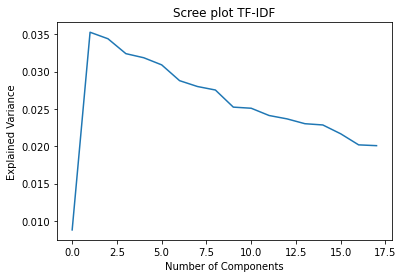

In [43]:
lsascree2 = TruncatedSVD(18)
lsascree2.fit(df_tfidf)
lsa_features2 = lsascree2.transform(df_tfidf)
plt.plot(lsascree2.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree plot TF-IDF')

# LSA TF-IDF

In [44]:
lsa_function(2,df_tfidf,cv_tfidf)

Explained Variance: [0.00879464 0.03491028]

Topic  0
love, baby, time, yeah, say, said, think, tell, home, night, right, come, bad, look, make

Topic  1
baby, love, bad, smile, ain, sorry, good, time, really, did, come, hey, beautiful, right, high
None


,ain,baby,bad,beautiful,best,better,blue,break,car,change,...,trying,turn,waiting,walk,wanted,won,world,wrong,yeah,years
0,0.085,0.241,0.131,0.072,0.100,0.117,0.057,0.076,0.060,0.042,...,0.080,0.048,0.080,0.060,0.043,0.089,0.051,0.060,0.194,0.044
1,0.130,0.568,0.153,0.087,-0.105,-0.039,-0.061,0.051,-0.059,0.010,...,-0.078,-0.021,0.017,-0.034,-0.013,0.070,-0.025,-0.035,-0.280,-0.042


In [45]:
lsa_function(3,df_tfidf,cv_tfidf)

Explained Variance: [0.00879339 0.03476453 0.03388777]

Topic  0
love, baby, time, yeah, say, said, think, tell, home, night, right, come, bad, look, make

Topic  1
baby, come, bad, did, sorry, smile, good, coming, hey, ain, new, really, right, play, high

Topic  2
love, good, beautiful, right, end, bad, light, miss, heart, coming, knew, long, loved, feel, come
None


,ain,baby,bad,beautiful,best,better,blue,break,car,change,...,trying,turn,waiting,walk,wanted,won,world,wrong,yeah,years
0,0.085,0.241,0.131,0.072,0.100,0.117,0.057,0.076,0.060,0.042,...,0.080,0.048,0.080,0.060,0.043,0.089,0.051,0.060,0.194,0.044
1,0.109,0.547,0.168,0.037,-0.147,-0.090,-0.067,0.055,-0.070,0.030,...,-0.079,-0.026,0.002,0.005,0.008,0.039,-0.009,-0.003,-0.211,-0.032
2,-0.112,-0.319,0.109,0.204,-0.150,-0.320,0.048,0.019,0.023,0.006,...,0.043,-0.001,-0.041,-0.029,-0.027,-0.162,0.045,-0.014,0.045,-0.011


In [46]:
lsa_function(4,df_tfidf,cv_tfidf)

Explained Variance: [0.00879384 0.03523428 0.0342991  0.03213068]

Topic  0
love, baby, time, yeah, say, said, think, tell, home, night, right, come, bad, look, make

Topic  1
baby, love, bad, good, sorry, smile, come, ain, hey, beautiful, coming, time, did, really, high

Topic  2
love, beautiful, good, right, end, come, heart, miss, knew, light, loved, lights, long, saw, feel

Topic  3
said, gone, did, think, girl, forever, thought, wrong, come, feel, home, rain, phone, door, kiss
None


,ain,baby,bad,beautiful,best,better,blue,break,car,change,...,trying,turn,waiting,walk,wanted,won,world,wrong,yeah,years
0,0.085,0.241,0.131,0.072,0.100,0.117,0.057,0.076,0.060,0.042,...,0.080,0.048,0.080,0.060,0.043,0.089,0.051,0.060,0.194,0.044
1,0.111,0.502,0.164,0.098,-0.141,-0.095,-0.057,0.072,-0.064,0.015,...,-0.103,-0.020,0.007,-0.028,-0.011,0.038,-0.023,-0.043,-0.271,-0.044
2,-0.108,-0.412,0.025,0.252,-0.093,-0.254,0.047,0.012,0.045,0.016,...,0.051,0.002,0.008,-0.020,-0.017,-0.158,0.044,-0.029,0.057,-0.000
3,-0.106,-0.032,-0.080,0.047,-0.213,-0.185,-0.021,0.070,0.047,-0.011,...,-0.152,0.044,-0.055,0.012,-0.063,-0.060,0.000,0.148,-0.397,-0.012


In [47]:
lsa_function(5,df_tfidf,cv_tfidf)

Explained Variance: [0.00879408 0.03524024 0.03432569 0.03231191 0.03155085]

Topic  0
love, baby, time, yeah, say, said, think, tell, home, night, right, come, bad, look, make

Topic  1
baby, love, bad, good, come, sorry, smile, ain, hey, right, coming, really, did, high, time

Topic  2
love, beautiful, good, right, end, come, heart, knew, long, miss, light, lights, saw, loved, home

Topic  3
said, gone, did, come, think, forever, girl, thought, feel, wrong, rain, phone, home, door, kiss

Topic  4
stay, beautiful, think, love, little, better, won, light, car, try, make, mind, smile, remember, turn
None


,ain,baby,bad,beautiful,best,better,blue,break,car,change,...,trying,turn,waiting,walk,wanted,won,world,wrong,yeah,years
0,0.085,0.241,0.131,0.072,0.100,0.117,0.057,0.076,0.060,0.042,...,0.080,0.048,0.080,0.060,0.043,0.089,0.051,0.060,0.194,0.044
1,0.115,0.529,0.160,0.079,-0.143,-0.096,-0.057,0.061,-0.064,0.013,...,-0.096,-0.023,0.017,-0.025,-0.011,0.041,-0.025,-0.043,-0.258,-0.042
2,-0.094,-0.385,0.010,0.250,-0.098,-0.271,0.041,0.007,0.026,0.010,...,0.033,0.002,0.015,-0.029,-0.023,-0.162,0.039,-0.036,0.027,-0.005
3,-0.104,-0.058,-0.071,0.031,-0.212,-0.158,-0.024,0.051,0.010,-0.000,...,-0.154,0.035,-0.040,-0.004,-0.058,-0.082,0.006,0.143,-0.400,-0.015
4,-0.027,-0.082,-0.170,0.329,0.026,0.105,-0.033,0.056,0.087,-0.023,...,-0.129,0.059,-0.001,-0.004,-0.027,0.101,-0.065,-0.041,-0.275,0.004


# LSA TF-IDF with Bi-grams

In [48]:
lsa2bi = TruncatedSVD(5)
doc_topic2bi = lsa2bi.fit_transform(doc_matrix_bi2)

In [49]:
topic_word2bi = pd.DataFrame(lsa2bi.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5"],
             columns = vectorizer_bi2.get_feature_names())

In [50]:
display_topics(lsa2bi, vectorizer_bi2.get_feature_names(), 10)


Topic  0
say, time, love, said, night, think, baby, eyes, right, tell

Topic  1
night, time, remember, best, things, said, place, street, walk, change

Topic  2
home, yeah, thing, gone, said, eyes, little, right, town, night

Topic  3
baby, say, didn, looking, think, thinking, try, door, did, phone

Topic  4
feel, walk, little, eyes, friends, beautiful, change, rain, going, wanted


# NMF TF-IDF

In [51]:
nmf_function(2,df_tfidf,cv_tfidf)


Topic  0
yeah, think, said, home, say, girl, better, night, tell, best, look, remember, dress, stay, time

Topic  1
love, baby, bad, come, good, time, right, smile, beautiful, let, sorry, coming, ain, new, life
None


/Users/lindsayread/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [52]:
nmf_function(3,df_tfidf,cv_tfidf)


Topic  0
yeah, think, said, home, say, girl, night, tell, best, look, dress, remember, better, stay, time

Topic  1
baby, sorry, bad, time, ain, won, smile, did, things, come, really, let, hey, better, night

Topic  2
love, good, beautiful, right, come, bad, heart, knew, light, saw, time, coming, lights, say, long
None


In [53]:
nmf_function(4,df_tfidf,cv_tfidf)


Topic  0
said, think, girl, home, gone, look, did, forever, come, say, feel, wrong, thought, didn, long

Topic  1
baby, time, sorry, bad, ain, won, smile, better, things, let, really, hey, tell, life, come

Topic  2
love, good, beautiful, right, heart, light, saw, knew, time, bad, coming, lights, let, break, say

Topic  3
yeah, best, night, stay, trying, tell, remember, time, right, say, better, day, head, hands, hold
None


/Users/lindsayread/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [54]:
nmf_function(5,df_tfidf,cv_tfidf)


Topic  0
said, girl, home, think, gone, come, did, look, say, forever, feel, wrong, thought, didn, long

Topic  1
baby, time, sorry, ain, bad, won, smile, better, things, let, tell, really, night, life, hey

Topic  2
love, good, beautiful, right, heart, saw, bad, light, coming, time, knew, lights, let, break, say

Topic  3
yeah, best, trying, night, tell, remember, time, head, hands, right, new, feeling, say, end, day

Topic  4
stay, think, little, beautiful, won, home, right, hand, light, hold, getting, hey, break, make, let
None


/Users/lindsayread/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [55]:
nmf_function(6,df_tfidf,cv_tfidf)


Topic  0
said, think, gone, did, home, wrong, girl, thought, forever, dress, feel, didn, little, say, rain

Topic  1
baby, bad, smile, won, ain, really, time, let, hey, sorry, high, make, coming, life, things

Topic  2
love, good, beautiful, heart, right, saw, lights, light, knew, coming, let, bad, eyes, break, time

Topic  3
yeah, trying, girl, home, end, head, look, bad, hands, best, feeling, right, blue, heard, new

Topic  4
stay, little, beautiful, think, right, won, hand, hold, home, getting, hey, time, light, let, break

Topic  5
time, come, tell, day, say, remember, night, long, looking, better, need, best, dreams, sorry, things
None


/Users/lindsayread/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [56]:
nmf_function(7,df_tfidf,cv_tfidf)


Topic  0
girl, home, look, forever, long, feel, drive, say, place, yeah, lights, trying, phone, world, lost

Topic  1
baby, bad, smile, won, ain, really, hey, let, coming, make, high, time, eyes, better, sorry

Topic  2
love, good, beautiful, heart, right, saw, light, lights, knew, coming, let, bad, break, eyes, time

Topic  3
yeah, trying, head, best, end, hands, new, right, dress, feeling, street, waiting, bad, night, blue

Topic  4
stay, little, beautiful, think, won, right, hand, home, hold, getting, hey, time, light, let, make

Topic  5
time, come, tell, day, say, night, looking, long, need, better, sorry, remember, dreams, best, things

Topic  6
said, think, gone, did, thought, wrong, dress, things, little, head, mind, didn, rain, say, remember
None


/Users/lindsayread/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [57]:
nmf_function(8,df_tfidf,cv_tfidf)


Topic  0
girl, home, look, forever, long, say, drive, feel, yeah, place, lights, trying, phone, world, lost

Topic  1
baby, bad, smile, won, ain, really, hey, coming, high, let, make, life, eyes, hand, sorry

Topic  2
love, good, beautiful, heart, saw, right, light, lights, knew, time, let, coming, hands, eyes, break

Topic  3
yeah, trying, head, end, best, hands, new, right, feeling, street, waiting, dress, bad, blue, night

Topic  4
stay, little, beautiful, think, right, won, hand, home, hold, hey, getting, light, let, break, make

Topic  5
time, better, tell, night, looking, say, best, sorry, remember, dreams, try, ain, didn, long, day

Topic  6
said, think, gone, did, thought, wrong, things, dress, little, head, remember, mind, say, didn, forever

Topic  7
come, day, right, miss, feeling, new, kiss, need, feel, forget, play, long, fall, rain, getting
None


In [58]:
nmf_function(9,df_tfidf,cv_tfidf)


Topic  0
girl, home, look, forever, long, say, yeah, drive, place, feel, trying, phone, lights, world, fine

Topic  1
baby, bad, smile, won, ain, really, high, hey, let, life, hand, coming, eyes, new, things

Topic  2
love, beautiful, lights, knew, time, life, saw, heart, long, high, right, eyes, little, smile, let

Topic  3
yeah, trying, head, end, best, hands, new, right, feeling, street, waiting, dress, night, blue, bad

Topic  4
stay, little, think, beautiful, right, hand, won, home, hold, hey, getting, light, let, break, make

Topic  5
better, time, tell, night, sorry, say, looking, best, try, didn, dreams, ain, let, run, long

Topic  6
said, think, gone, did, thought, wrong, things, dress, little, head, didn, mind, forever, say, rain

Topic  7
come, day, right, feeling, miss, kiss, new, long, forget, feel, need, rain, fall, change, fight

Topic  8
good, remember, bad, coming, looking, break, play, light, say, make, right, room, heart, hey, getting
None


In [59]:
nmf_function(10,df_tfidf,cv_tfidf)


Topic  0
girl, home, look, forever, long, yeah, say, place, drive, feel, trying, phone, lights, world, fine

Topic  1
baby, bad, smile, won, ain, really, high, hey, life, hand, new, things, eyes, let, make

Topic  2
love, beautiful, lights, knew, life, saw, eyes, high, heart, little, right, smile, didn, end, home

Topic  3
yeah, trying, head, end, best, hands, new, right, feeling, street, waiting, dress, night, bad, blue

Topic  4
stay, little, think, beautiful, right, hand, hold, home, hey, won, getting, let, time, light, break

Topic  5
time, tell, night, sorry, long, dreams, say, let, need, remember, run, hard, looking, ain, hold

Topic  6
said, gone, think, did, thought, wrong, things, dress, little, head, didn, forever, say, mind, phone

Topic  7
come, day, right, feeling, miss, kiss, new, forget, feel, rain, long, need, fall, change, things

Topic  8
good, bad, remember, coming, looking, break, play, light, say, make, right, room, heart, hey, getting

Topic  9
better, best, won,

In [60]:
nmf_function(11,df_tfidf,cv_tfidf)


Topic  0
girl, home, look, forever, long, yeah, drive, place, phone, trying, lights, say, fine, world, heart

Topic  1
baby, bad, smile, won, high, hey, really, ain, let, hand, new, coming, things, eyes, run

Topic  2
love, beautiful, lights, knew, life, saw, high, eyes, little, smile, heart, right, home, didn, end

Topic  3
yeah, trying, head, end, best, hands, new, right, street, feeling, waiting, dress, bad, blue, night

Topic  4
stay, little, beautiful, think, right, hand, home, hey, hold, won, getting, let, light, night, say

Topic  5
time, sorry, ain, long, night, life, change, town, turn, hold, times, drive, really, let, dreams

Topic  6
said, think, gone, did, thought, wrong, things, little, dress, head, mind, rain, didn, thinking, phone

Topic  7
come, day, right, miss, feeling, new, kiss, forget, long, rain, feel, fall, things, need, change

Topic  8
good, remember, bad, coming, looking, break, play, light, right, make, say, heart, room, getting, hey

Topic  9
better, best, 

In [61]:
nmf_function(12,df_tfidf,cv_tfidf)


Topic  0
girl, home, look, long, forever, yeah, drive, place, phone, lights, fine, world, trying, heart, thing

Topic  1
baby, smile, bad, won, high, things, ain, new, hey, hand, really, life, let, run, lights

Topic  2
love, beautiful, lights, life, knew, high, saw, little, eyes, smile, right, didn, long, home, heart

Topic  3
yeah, trying, head, end, right, new, hands, feeling, best, street, bad, waiting, heard, blue, old

Topic  4
stay, little, think, beautiful, right, hand, hey, home, won, hold, let, getting, light, say, break

Topic  5
remember, night, dreams, best, hold, forget, long, things, thing, place, lost, looking, hard, said, getting

Topic  6
said, think, gone, did, thought, wrong, things, head, little, dress, mind, rain, didn, phone, thinking

Topic  7
come, day, right, miss, feeling, new, kiss, rain, forget, long, feel, knew, need, fall, change

Topic  8
good, bad, coming, play, break, light, make, right, heart, looking, say, hey, getting, room, did

Topic  9
better, b

NMF with TF-IDF vectorizer and 9, 10, or 11 topics seems to produce the best topics.

In [62]:
def nmf_HMatrix(num_components, doc_text_matrix, vectorizer):
    nmf = NMF(num_components)
    doc_topic = nmf.fit_transform(doc_text_matrix)
    
    idx = []
    for i in range(num_components):
        idx.append(i) 
    H = pd.DataFrame(doc_topic.round(3),
                    index = song_titles,
                    columns = idx)
    return H

In [63]:
h9 = nmf_HMatrix(9,df_tfidf,cv_tfidf)

In [64]:
h9

,0,1,2,3,4,5,6,7,8
Tim McGraw,0.000,0.000,0.000,0.057,0.071,0.028,0.353,0.000,0.000
Picture To Burn,0.010,0.214,0.066,0.034,0.000,0.199,0.000,0.010,0.028
Teardrops On My Guitar,0.106,0.048,0.254,0.000,0.086,0.132,0.013,0.000,0.028
A Place In This World,0.265,0.000,0.000,0.109,0.000,0.000,0.000,0.000,0.000
Cold as You,0.000,0.023,0.000,0.004,0.005,0.072,0.066,0.201,0.056
...,...,...,...,...,...,...,...,...,...
Miss Americana & the Heartbreak Prince,0.139,0.148,0.008,0.048,0.000,0.000,0.038,0.059,0.154
Paper Rings,0.026,0.107,0.054,0.045,0.009,0.112,0.003,0.113,0.000
Soon You'll Get Better (feat. Dixie Chicks),0.000,0.032,0.000,0.001,0.024,0.487,0.000,0.000,0.000
The Archer,0.000,0.000,0.000,0.078,0.358,0.000,0.000,0.138,0.049


In [65]:
h11 = nmf_HMatrix(11,df_tfidf,cv_tfidf)
h11

,0,1,2,3,4,5,6,7,8,9,10
Tim McGraw,0.007,0.000,0.000,0.057,0.055,0.000,0.364,0.000,0.000,0.043,0.048
Picture To Burn,0.010,0.201,0.042,0.032,0.000,0.037,0.000,0.035,0.008,0.040,0.287
Teardrops On My Guitar,0.098,0.043,0.258,0.000,0.062,0.008,0.016,0.039,0.000,0.192,0.077
A Place In This World,0.233,0.000,0.000,0.097,0.000,0.046,0.000,0.000,0.000,0.000,0.000
Cold as You,0.000,0.020,0.000,0.001,0.005,0.082,0.060,0.043,0.197,0.073,0.013
...,...,...,...,...,...,...,...,...,...,...,...
Miss Americana & the Heartbreak Prince,0.131,0.144,0.000,0.047,0.000,0.000,0.045,0.156,0.058,0.000,0.062
Paper Rings,0.028,0.105,0.049,0.042,0.009,0.086,0.000,0.000,0.105,0.000,0.122
Soon You'll Get Better (feat. Dixie Chicks),0.000,0.035,0.000,0.000,0.009,0.086,0.000,0.006,0.000,0.659,0.044
The Archer,0.000,0.000,0.000,0.084,0.370,0.000,0.000,0.064,0.142,0.000,0.004


## K-Means Clustering on NMF (with TF-IDF):

In [66]:
kmeans9 = KMeans(n_clusters=5,random_state=555)
clustering_ori9 = kmeans9.fit_predict(h9)

In [67]:
h9.tail(5)

,0,1,2,3,4,5,6,7,8
Miss Americana & the Heartbreak Prince,0.139,0.148,0.008,0.048,0.000,0.000,0.038,0.059,0.154
Paper Rings,0.026,0.107,0.054,0.045,0.009,0.112,0.003,0.113,0.000
Soon You'll Get Better (feat. Dixie Chicks),0.000,0.032,0.000,0.001,0.024,0.487,0.000,0.000,0.000
The Archer,0.000,0.000,0.000,0.078,0.358,0.000,0.000,0.138,0.049
You Need to Calm Down,0.000,0.012,0.000,0.023,0.008,0.151,0.000,0.072,0.048


In [68]:
kmeans9.cluster_centers_

array([[0.01514286, 0.04971429, 0.03085714, 0.3645    , 0.02928571,
        0.05471429, 0.03785714, 0.01528571, 0.01785714],
       [0.02329167, 0.04733333, 0.03933333, 0.033625  , 0.01133333,
        0.26366667, 0.03154167, 0.04620833, 0.018625  ],
       [0.03475   , 0.0471875 , 0.284     , 0.0330625 , 0.177125  ,
        0.040125  , 0.0391875 , 0.016875  , 0.021375  ],
       [0.06438298, 0.02614894, 0.04942553, 0.03370213, 0.01719149,
        0.02810638, 0.11795745, 0.07742553, 0.09861702],
       [0.0243    , 0.4189    , 0.0528    , 0.0201    , 0.0267    ,
        0.0623    , 0.0249    , 0.0469    , 0.0333    ]])

### Clusters with Relation to Topics (based on cluster_centers_)

Cluster 0: Mostly about Topic 3

Cluster 1: Mostly about Topic 5

Cluster 2: Mostly about Topics 2 and 4

Cluster 3: Mostly about Topics 6, 8, 7, and 0

Cluster 4: Mostly about Topic 1. Some Topic 5 and 2.

## Visualization with DBSCAN

In [70]:
dbscan9 = DBSCAN(eps=0.2,min_samples=3).fit(h9)

In [71]:
dbscan9.labels_

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        2,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  1,  2,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0, -1,  0, -1,
       -1, -1,  0, -1,  0,  0,  0, -1,  0])

In [72]:
X = StandardScaler().fit_transform(h9)

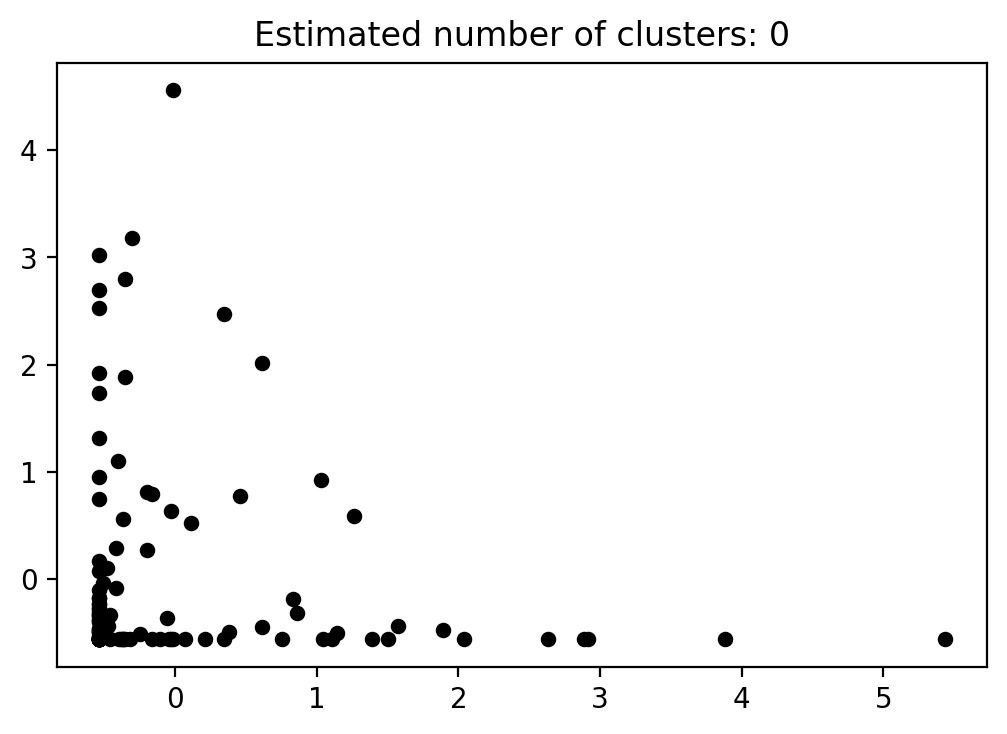

In [74]:
db = DBSCAN(eps=0.2, min_samples=4).fit(X)

# Let's find the observations DBSCAN called "core"
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
plt.figure(dpi=200)
show_core = True
show_non_core = True
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    if show_core:
        xy = X[class_member_mask & core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1) # add black border for core points
    
    if show_non_core:
        xy = X[class_member_mask & ~core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, s=20, linewidths=1.1)

plt.title('Estimated number of clusters: %d' % n_clusters_);

## Visualization with TSNE

In [75]:
Xtsne9 = TSNE(n_components=2,random_state=467).fit_transform(h9)
dftsne9 = pd.DataFrame(Xtsne9)
dftsne9['cluster'] = clustering_ori9
dftsne9.columns = ['x1','x2','cluster']

In [76]:
dftsne2d9 = dftsne9
dftsne2d9['cluster'] = clustering_ori9

In [77]:
dftsne2d9.head()

,x1,x2,cluster
0,-5.565605,-2.144294,3
1,4.037211,-2.131413,1
2,-0.306935,-2.582134,2
3,0.567557,0.992481,3
4,-0.459243,-1.283168,3


In [78]:
tableau_df = pd.concat([spotify,dftsne2d9],axis=1)

In [79]:
tableau_df.head()

,track_album,track_artist,track_title,danceability,energy,key,loudness,mode,speechiness,acousticness,...,time_signature,track_uri,track_id,track_lyric,genres,year_released,world_sales_USD,x1,x2,cluster
0,Taylor Swift,Taylor Swift,Tim McGraw,0.580,0.491,0,-6.462,1,0.0251,0.575,...,4,spotify:track:0Om9WAB5RS09L80DyOfTNa,0Om9WAB5RS09L80DyOfTNa,he said the way my blue eyes shined put those ...,Country,2006,7000000,-5.565605,-2.144294,3
1,Taylor Swift,Taylor Swift,Picture To Burn,0.658,0.877,7,-2.098,1,0.0323,0.173,...,4,spotify:track:32mVHdy0bi1XKgr0ajsBlG,32mVHdy0bi1XKgr0ajsBlG,state the obvious i didn t get my perfect fan...,Country Rock,2006,7000000,4.037211,-2.131413,1
2,Taylor Swift,Taylor Swift,Teardrops On My Guitar,0.621,0.417,10,-6.941,1,0.0231,0.288,...,4,spotify:track:7zMcNqs55Mxer82bvZFkpg,7zMcNqs55Mxer82bvZFkpg,drew looks at me i fake a smile so he won t se...,Country Pop,2006,7000000,-0.306935,-2.582134,2
3,Taylor Swift,Taylor Swift,A Place In This World,0.576,0.777,9,-2.881,1,0.0324,0.051,...,4,spotify:track:73OX8GdpOeGzKC6OvGSbsv,73OX8GdpOeGzKC6OvGSbsv,i don t know what i want so don t ask me caus...,Country Pop,2006,7000000,0.567557,0.992481,3
4,Taylor Swift,Taylor Swift,Cold as You,0.418,0.482,5,-5.769,1,0.0266,0.217,...,4,spotify:track:7an1exwMnfYRcdVQm0yDev,7an1exwMnfYRcdVQm0yDev,you have a way of coming easily to me and when...,Country,2006,7000000,-0.459243,-1.283168,3


In [80]:
tableau_df.to_csv(r'full_df2.csv',index=False, header=True)

In [83]:
kmeans11 = KMeans(n_clusters=5,random_state=170)
clustering_ori11 = kmeans11.fit_predict(h11)

In [84]:
Xtsne = TSNE(n_components=2,random_state=879).fit_transform(h11)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clustering_ori11
dftsne.columns = ['x1','x2','cluster']

In [85]:
dftsne2d11 = dftsne
dftsne2d11['cluster'] = clustering_ori11

In [86]:
dftsne2d11

,x1,x2,cluster
0,5.893362,-5.143504,0
1,-2.943644,-0.703904,4
2,3.523659,1.260154,0
3,2.376999,-4.124897,0
4,0.987731,-1.413858,0
...,...,...,...
106,3.221255,-1.897877,0
107,0.254182,-2.292215,0
108,-2.188454,-8.961349,1
109,0.636082,3.748459,2


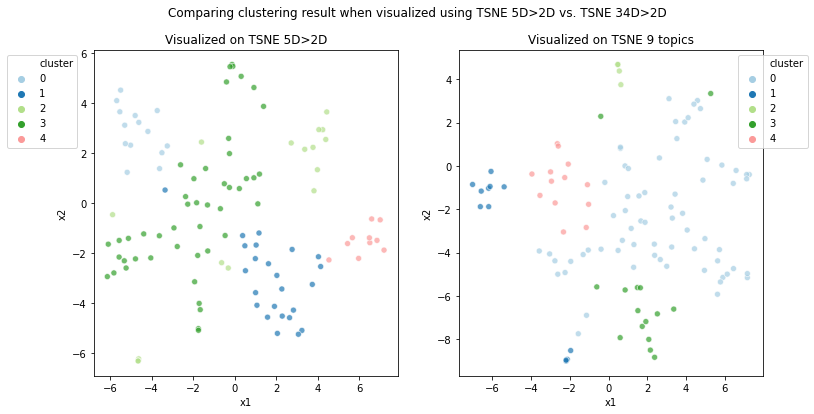

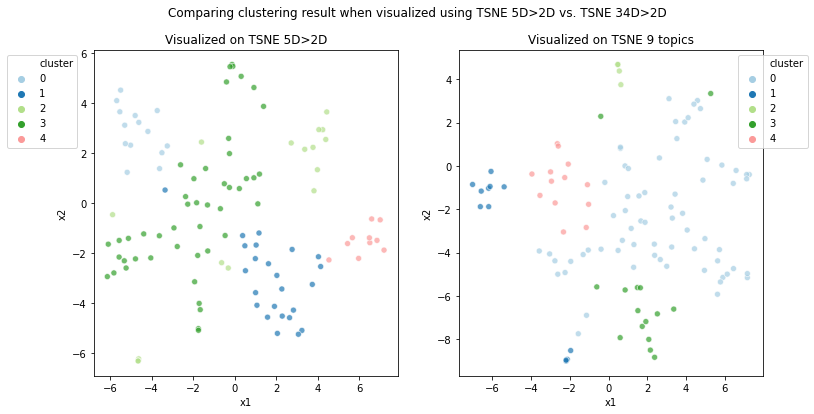

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne2d9,x='x1',y='x2',hue='cluster',legend="full",alpha=0.7,ax=ax[0],palette='Paired')
ax[0].set_title('Visualized on TSNE 5D>2D')
ax[0].legend(bbox_to_anchor=(-0.3,1),loc=2)
sns.scatterplot(data=dftsne2d11,x='x1',y='x2',hue='cluster',legend="full",alpha=0.7,ax=ax[1],palette='Paired')
ax[1].set_title('Visualized on TSNE 9 topics')
ax[1].legend(bbox_to_anchor=(0.9,1),loc=2)
fig.suptitle('Comparing clustering result when visualized using TSNE 5D>2D vs. TSNE 34D>2D')
display(fig)

### Mean World Wide Sales Per Cluster:

In [89]:
final_df = tableau_df

In [90]:
final_df.head()

,track_album,track_artist,track_title,danceability,energy,key,loudness,mode,speechiness,acousticness,...,time_signature,track_uri,track_id,track_lyric,genres,year_released,world_sales_USD,x1,x2,cluster
0,Taylor Swift,Taylor Swift,Tim McGraw,0.580,0.491,0,-6.462,1,0.0251,0.575,...,4,spotify:track:0Om9WAB5RS09L80DyOfTNa,0Om9WAB5RS09L80DyOfTNa,he said the way my blue eyes shined put those ...,Country,2006,7000000,-5.565605,-2.144294,3
1,Taylor Swift,Taylor Swift,Picture To Burn,0.658,0.877,7,-2.098,1,0.0323,0.173,...,4,spotify:track:32mVHdy0bi1XKgr0ajsBlG,32mVHdy0bi1XKgr0ajsBlG,state the obvious i didn t get my perfect fan...,Country Rock,2006,7000000,4.037211,-2.131413,1
2,Taylor Swift,Taylor Swift,Teardrops On My Guitar,0.621,0.417,10,-6.941,1,0.0231,0.288,...,4,spotify:track:7zMcNqs55Mxer82bvZFkpg,7zMcNqs55Mxer82bvZFkpg,drew looks at me i fake a smile so he won t se...,Country Pop,2006,7000000,-0.306935,-2.582134,2
3,Taylor Swift,Taylor Swift,A Place In This World,0.576,0.777,9,-2.881,1,0.0324,0.051,...,4,spotify:track:73OX8GdpOeGzKC6OvGSbsv,73OX8GdpOeGzKC6OvGSbsv,i don t know what i want so don t ask me caus...,Country Pop,2006,7000000,0.567557,0.992481,3
4,Taylor Swift,Taylor Swift,Cold as You,0.418,0.482,5,-5.769,1,0.0266,0.217,...,4,spotify:track:7an1exwMnfYRcdVQm0yDev,7an1exwMnfYRcdVQm0yDev,you have a way of coming easily to me and when...,Country,2006,7000000,-0.459243,-1.283168,3


In [91]:
final_cluster0 = final_df[final_df['cluster']==0]
final_cluster1 = final_df[final_df['cluster']==1]
final_cluster2 = final_df[final_df['cluster']==2]
final_cluster3 = final_df[final_df['cluster']==3]
final_cluster4 = final_df[final_df['cluster']==4]

In [92]:
print(final_cluster0['world_sales_USD'].mean())
print(final_cluster1['world_sales_USD'].mean())
print(final_cluster2['world_sales_USD'].mean())
print(final_cluster3['world_sales_USD'].mean())
print(final_cluster4['world_sales_USD'].mean())

5535714.285714285
7916666.666666667
7218750.0
6861702.127659574
6700000.0


In [93]:
KM9 = KMeans(n_clusters=5,random_state=199)
clustering_oriKM9 = kmeans9.fit_predict(h9)

In [94]:
Xtsne9 = TSNE(n_components=2,random_state=24).fit_transform(h9)
tsne9 = pd.DataFrame(Xtsne9)
tsne9['cluster'] = clustering_oriKM9
tsne9.columns = ['x1','x2','cluster']

tsne9['cluster'] = clustering_oriKM9

In [95]:
tsne9

,x1,x2,cluster
0,5.211853,7.981372,3
1,-3.652538,1.448218,1
2,-4.464827,4.929675,2
3,0.671046,8.984304,3
4,-1.130948,5.479666,3
...,...,...,...
106,-0.080085,7.039864,3
107,-0.749628,4.254309,1
108,-0.974250,-0.404637,1
109,2.787287,-1.435306,2


In [96]:
print(len(tsne9[tsne9['cluster']==0]))
print(len(tsne9[tsne9['cluster']==1]))
print(len(tsne9[tsne9['cluster']==2]))
print(len(tsne9[tsne9['cluster']==3]))
print(len(tsne9[tsne9['cluster']==4]))

14
24
16
47
10


# Exploring Similar Songs with Cosine Similarity

In [97]:
doc_similarity_matrix9 = pd.DataFrame(cosine_similarity(h9))
doc_similarity_matrix9.head(15)

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,1.000000,0.067758,0.122150,0.059303,0.305801,0.079529,0.007457,0.133400,0.906208,0.808839,...,0.171491,0.220100,0.080442,0.237896,0.046670,0.164348,0.098197,0.086180,0.207002,0.094826
1,0.067758,1.000000,0.564585,0.073174,0.327065,0.744168,0.763424,0.158216,0.242070,0.129719,...,0.793062,0.100091,0.246692,0.253967,0.705824,0.492484,0.827106,0.700721,0.045179,0.664158
2,0.122150,0.564585,1.000000,0.304232,0.180402,0.431211,0.257418,0.756174,0.107208,0.457543,...,0.392652,0.252233,0.677175,0.658163,0.170345,0.331122,0.560281,0.431140,0.252943,0.397129
3,0.059303,0.073174,0.304232,1.000000,0.006569,0.009653,0.008976,0.000000,0.052445,0.171906,...,0.212248,0.631752,0.196284,0.870973,0.055882,0.546240,0.199744,0.000778,0.075197,0.049671
4,0.305801,0.327065,0.180402,0.006569,1.000000,0.344868,0.130020,0.014830,0.301250,0.445539,...,0.200605,0.024420,0.015208,0.136646,0.112778,0.427096,0.705210,0.317411,0.356531,0.697098
5,0.079529,0.744168,0.431211,0.009653,0.344868,1.000000,0.172851,0.000000,0.040293,0.002790,...,0.363969,0.019962,0.015884,0.110198,0.118066,0.131135,0.603353,0.991333,0.018322,0.886560
6,0.007457,0.763424,0.257418,0.008976,0.130020,0.172851,1.000000,0.077941,0.337200,0.072715,...,0.851136,0.018562,0.105515,0.139194,0.988062,0.586795,0.575807,0.114120,0.012607,0.129552
7,0.133400,0.158216,0.756174,0.000000,0.014830,0.000000,0.077941,1.000000,0.000000,0.331034,...,0.278286,0.344796,0.622188,0.379788,0.000000,0.021631,0.220419,0.033741,0.623281,0.031201
8,0.906208,0.242070,0.107208,0.052445,0.301250,0.040293,0.337200,0.000000,1.000000,0.804909,...,0.333650,0.020389,0.000000,0.224635,0.388030,0.349404,0.197482,0.022282,0.000000,0.023180
9,0.808839,0.129719,0.457543,0.171906,0.445539,0.002790,0.072715,0.331034,0.804909,1.000000,...,0.082751,0.066832,0.390029,0.442532,0.075221,0.292844,0.296447,0.001543,0.082407,0.097919


In [98]:
doc_similarity_matrix9.tail(15)

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
96,0.153583,0.235799,0.048011,0.387427,0.042330,0.048569,0.191967,0.014384,0.057248,0.015475,...,0.343644,0.779901,0.526238,0.292274,0.166300,0.295955,0.308211,0.012885,0.199283,0.149904
97,0.026822,0.232006,0.112844,0.072935,0.254673,0.128860,0.232727,0.000000,0.059688,0.005607,...,0.234048,0.138254,0.114028,0.274112,0.174041,0.686319,0.128973,0.011752,0.154412,0.298535
98,0.140557,0.589646,0.876019,0.255198,0.124838,0.188862,0.528058,0.606544,0.290146,0.554501,...,0.446804,0.099213,0.714639,0.576250,0.457450,0.426441,0.557248,0.167169,0.000000,0.148930
99,0.454444,0.265143,0.633106,0.009034,0.301937,0.159143,0.110315,0.483200,0.430941,0.687540,...,0.080732,0.018681,0.596685,0.432949,0.022194,0.421569,0.239164,0.097350,0.076782,0.244984
100,0.924889,0.068724,0.096715,0.175867,0.259688,0.011732,0.019220,0.056307,0.829105,0.775317,...,0.132003,0.363685,0.304898,0.284921,0.042699,0.209766,0.134116,0.000946,0.091391,0.060368
101,0.171491,0.793062,0.392652,0.212248,0.200605,0.363969,0.851136,0.278286,0.333650,0.082751,...,1.000000,0.415900,0.106462,0.360801,0.846419,0.609998,0.656081,0.331535,0.414446,0.337173
102,0.220100,0.100091,0.252233,0.631752,0.024420,0.019962,0.018562,0.344796,0.020389,0.066832,...,0.415900,1.000000,0.405907,0.602888,0.021725,0.326441,0.239055,0.026262,0.610885,0.125513
103,0.080442,0.246692,0.677175,0.196284,0.015208,0.015884,0.105515,0.622188,0.000000,0.390029,...,0.106462,0.405907,1.000000,0.423498,0.000000,0.132563,0.337026,0.001056,0.105236,0.074474
104,0.237896,0.253967,0.658163,0.870973,0.136646,0.110198,0.139194,0.379788,0.224635,0.442532,...,0.360801,0.602888,0.423498,1.000000,0.140059,0.679396,0.341614,0.087313,0.259005,0.168469
105,0.046670,0.705824,0.170345,0.055882,0.112778,0.118066,0.988062,0.000000,0.388030,0.075221,...,0.846419,0.021725,0.000000,0.140059,1.000000,0.587103,0.525986,0.065291,0.000000,0.067923


In [99]:
doc_similarity_matrix9[0][1].round(3)

0.068

In [100]:
doc_similarity_matrix9[0].nlargest(5)

0      1.000000
75     0.978577
38     0.973273
91     0.936580
100    0.924889
Name: 0, dtype: float64

In [101]:
doc_similarity_matrix9[5].nlargest(5)

5      1.000000
50     0.993692
108    0.991333
57     0.981160
53     0.975672
Name: 5, dtype: float64

In [102]:
spotify.track_title[5],spotify.track_title[50]

('The Outside', 'I Almost Do')

In [103]:
doc_similarity_matrix9[1].nlargest(5)

1     1.000000
79    0.985590
22    0.948287
18    0.897878
19    0.886011
Name: 1, dtype: float64

In [104]:
spotify.track_title[1],spotify.track_title[79],spotify.track_title[22]

('Picture To Burn', '...Ready for It?', 'Youre Not Sorry')

In [105]:
spotify.track_lyric[1]

'state the obvious  i didn t get my perfect fantasy i realize you love yourself more than you could ever love me so go and tell your friends that i m obsessive and crazy that s fine  i ll tell mine that you re gay by the way i hate that stupid old pickup truck you never let me drive you re a redneck heartbreak who s really bad at lying so watch me strike a match on all my wasted time as far as i m concerned you re just another picture to burn there s no time for tears i m just sitting here planning my revenge there s nothing stopping me from going out with all of your best friends and if you come around saying sorry to me my daddy s gonna show you how sorry you ll be i hate that stupid old pickup truck you never let me drive you re a redneck heartbreak who s really bad at lying so watch me strike a match on all my wasted time as far as i m concerned you re just another picture to burn and if you re missing me you d better keep it to yourself  cause coming back around here would be bad 

In [106]:
spotify.track_lyric[79]

'knew he was a killer first time that i saw him wondered how many girls he had loved and left haunted but if he s a ghost  then i can be a phantom holdin  him for ransom  some some boys are tryin  too hard  he don t try at all though younger than my exes  but he act like such a man  so i see nothing better  i keep him forever like a vendetta ta i  i  i see how this is gon  go touch me and you ll never be alone i island breeze and lights down low no one has to know in the middle of the night  in my dreams you should see the things we do  baby in the middle of the night  in my dreams i know i m gonna be with you so i take my time are you ready for it  knew i was a robber first time that he saw me stealing hearts and running off and never sayin  sorry but if i m a thief  then he can join the heist  and we ll move to an island  and and he can be my jailer  burton to this taylor every love i ve known in comparison is a failure i forget their names now  i m so very tame now never be the same

In [107]:
spotify.track_lyric[22]

'all this time i was wasting hoping you would come around i ve been giving out chances every time and all you do is let me down and it s taken me this long baby but i ve figured you out and you re thinking we ll be fine again but not this time around you don t have to call anymore i won t pick up the phone this is the last straw don t wanna hurt anymore and you can tell me that you re sorry but i don t believe you baby like i did before you re not sorry  no no no no  you re looking so innocent i might believe you if i didn t know could ve loved you all my life if you hadn t left me waiting in the cold and you ve got your share of secrets and i m tired of being last to know and now you re asking me to listen  cause it s worked each time before but you don t have to call anymore i won t pick up the phone this is the last straw don t wanna hurt anymore and you can tell me that you re sorry but i don t believe you baby like i did before you re not sorry  no no no no  you re not sorry  no n

In [108]:
doc_similarity_matrix9[2].nlargest(5)

2     1.000000
35    0.931094
64    0.901478
98    0.876019
41    0.866561
Name: 2, dtype: float64

In [109]:
spotify.track_title[2],spotify.track_title[35]

('Teardrops On My Guitar', 'Enchanted')

In [110]:
doc_similarity_matrix9[2].nsmallest(5)

61    0.002785
42    0.013266
32    0.022145
96    0.048011
75    0.061345
Name: 2, dtype: float64

In [111]:
spotify.track_title[61],spotify.track_title[42]

('Come Back... Be Here', 'If This Was a Movie')